In [1]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from scipy.stats import norm

current_dir = os.getcwd()
project_root = os.path.dirname(os.path.dirname(current_dir))
PROCESSED_DATA_PATH = os.path.join(project_root, "data", "processed")
RAW_DATA_PATH = os.path.join(project_root, "data", "raw")
OUTPUT_PATH = os.path.join(project_root, "output")
REPORTS_TABLES_PATH = os.path.join(project_root, "reports", "tables")

In [2]:
data = pd.read_excel(RAW_DATA_PATH + "/HPM data_environmental performance.xlsx")
data = data.dropna()

In [3]:
for column in data.columns:
    if column.startswith('OUTCMX'):
        # drop column
        data = data.drop(column, axis=1)

In [4]:
df = data 

In [5]:
numeric_cols = df.select_dtypes(include=[float, int]).columns
df_numeric = df[numeric_cols]

In [21]:
n_factors=7

# Perform factor analysis using the number of factors you decided on
fa = FactorAnalyzer(n_factors=n_factors, rotation="promax")
fa.fit(df_numeric)

# Check the loadings (correlation coefficients between observed variables and latent common factors)
loadings = fa.loadings_
# print(loadings)

# Get variance of each factors
fa_variance = fa.get_factor_variance()
# print(fa_variance)


In [22]:
loadings_df = pd.DataFrame(loadings, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])],
                            index=df_numeric.columns)

# Create a DataFrame to store the results similar to the one you used for CFA
data = {
    'Item': [],
    'Factor1 Loading': [],
    'Factor2 Loading': [],  
    'Factor3 Loading': [],  
    'Factor4 Loading': [],
    'Factor5 Loading': [],
    'Factor6 Loading': [],
    'Factor7 Loading': [],
    'Communalities': [],
    'Uniqueness': []
}

for item in df_numeric.columns:
    item_loadings = loadings_df.loc[item].values  # Loadings for this item
    item_comm = fa.get_communalities()[df_numeric.columns.get_loc(item)]  # Communality for this item
    item_uniq = fa.get_uniquenesses()[df_numeric.columns.get_loc(item)]  # Uniqueness for this item

    data['Item'].append(item)
    data['Factor1 Loading'].append(item_loadings[0])
    data['Factor2 Loading'].append(item_loadings[1])  
    data['Factor3 Loading'].append(item_loadings[2]) 
    data['Factor4 Loading'].append(item_loadings[3])
    data['Factor5 Loading'].append(item_loadings[4])
    data['Factor6 Loading'].append(item_loadings[5])
    data['Factor7 Loading'].append(item_loadings[6])
    data['Communalities'].append(item_comm)
    data['Uniqueness'].append(item_uniq)

# Convert the data to a DataFrame
results_df = pd.DataFrame(data)

print(results_df)

            Item  Factor1 Loading  Factor2 Loading  Factor3 Loading  \
0   COMPANY CODE        -0.157700         0.031919         0.234158   
1       INDUSTRY         0.075921         0.149863        -0.246023   
2       ENVRTX21         0.599497        -0.150246        -0.027821   
3       ENVRTX37         0.068756        -0.039464         0.609247   
4       ENVRTX02         0.625077         0.110094         0.109456   
..           ...              ...              ...              ...   
69      SCHEDN02        -0.079329        -0.012011         0.039745   
70      SCHEDR03         0.085838         0.148951        -0.208032   
71      SETUPN01         0.115978        -0.041556         0.005430   
72      SETUPN02        -0.206732         0.161835         0.183350   
73      SETUPN03         0.105065         0.107369         0.120883   

    Factor4 Loading  Factor5 Loading  Factor6 Loading  Factor7 Loading  \
0          0.027794         0.081515        -0.011174         0.143023   

In [23]:
results_df

,Item,Factor1 Loading,Factor2 Loading,Factor3 Loading,Factor4 Loading,Factor5 Loading,Factor6 Loading,Factor7 Loading,Communalities,Uniqueness
0,COMPANY CODE,-0.157700,0.031919,0.234158,0.027794,0.081515,-0.011174,0.143023,0.108716,0.891284
1,INDUSTRY,0.075921,0.149863,-0.246023,-0.195877,0.134152,0.133669,0.082888,0.169852,0.830148
2,ENVRTX21,0.599497,-0.150246,-0.027821,0.112110,-0.207024,0.205018,-0.061020,0.483928,0.516072
3,ENVRTX37,0.068756,-0.039464,0.609247,-0.024387,-0.020147,0.005494,-0.071057,0.383546,0.616454
4,ENVRTX02,0.625077,0.110094,0.109456,0.086735,-0.013468,-0.266660,-0.067930,0.498249,0.501751
...,...,...,...,...,...,...,...,...,...,...
69,SCHEDN02,-0.079329,-0.012011,0.039745,0.578870,0.090061,0.093337,0.034650,0.361131,0.638869
70,SCHEDR03,0.085838,0.148951,-0.208032,0.000741,-0.117906,-0.165763,0.003879,0.114226,0.885774
71,SETUPN01,0.115978,-0.041556,0.005430,0.502493,0.104183,-0.044369,0.016710,0.280809,0.719191
72,SETUPN02,-0.206732,0.161835,0.183350,0.550110,-0.002984,0.002918,-0.023480,0.405736,0.594264


In [24]:
# Load the JSON file containing the shorter descriptions
with open(PROCESSED_DATA_PATH + '/codes.json', 'r') as f:
    codes = json.load(f)

# Create a mapping of original codes to descriptive names
code_to_name = {item['original_code']: item['descriptive_name'] for item in codes}

results_df['descriptive_name'] = results_df['Item'].map(code_to_name)


In [25]:
# To save the results to a CSV file
results_df.to_csv(OUTPUT_PATH + '/total_efa.csv', index=False)

[20.27423924  5.19775159  3.65468285  3.39351794  2.74608882  2.18420039
  2.04014018  1.93382588  1.6841565   1.53599888  1.46878902  1.38870198
  1.3403805   1.23298171  1.10702824  1.09331581  1.06083326  0.96905545
  0.91774175  0.8810156 ]


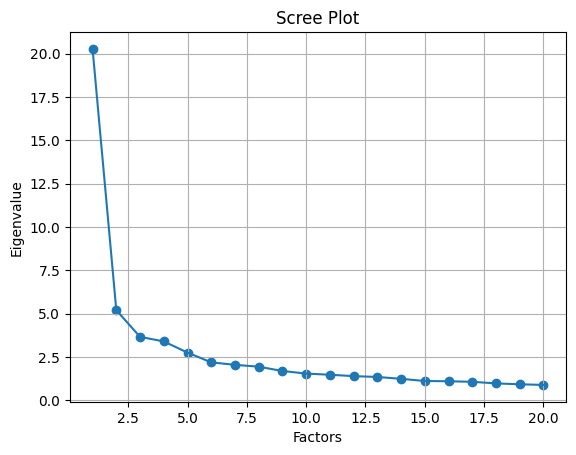

     Factor  Eigenvalue  Variance Explained %  Cumulative Variance Explained %
0  Factor 1   20.274239             26.770974                        26.770974
1  Factor 2    5.197752              6.296780                        33.067754
2  Factor 3    3.654683              4.362066                        37.429821
3  Factor 4    3.393518              3.945660                        41.375481
4  Factor 5    2.746089              3.003128                        44.378609
5  Factor 6    2.184200              2.426975                        46.805584
6  Factor 7    2.040140              2.098922                        48.904506


In [26]:
fa = FactorAnalyzer(n_factors=7, rotation=None)
fa.fit(df_numeric)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()

# Print Eigenvalues (top 20 for preview)
print(ev[:20])  # Print only the top 20 eigenvalues

# Plot the eigenvalues for the top 20 factors
plt.scatter(range(1, 21), ev[:20])  # Plot only the top 20 points
plt.plot(range(1, 21), ev[:20])  # Connect only the top 20 points
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Extract variance explained by each factor
explained_variance = fa.get_factor_variance()

# Calculate the percentage of total variance explained by each factor
percentage_variance_explained = explained_variance[1] * 100

# Calculate the cumulative variance explained
cumulative_variance_explained = percentage_variance_explained.cumsum()

# Creating the DataFrame for the five factors
variance_df = pd.DataFrame({
    'Factor': [f'Factor {i+1}' for i in range(7)],
    'Eigenvalue': ev[:7],
    'Variance Explained %': percentage_variance_explained[:7],
    'Cumulative Variance Explained %': cumulative_variance_explained[:7]
})

# Display the DataFrame
print(variance_df)


In [27]:
variance_df

,Factor,Eigenvalue,Variance Explained %,Cumulative Variance Explained %
0,Factor 1,20.274239,26.770974,26.770974
1,Factor 2,5.197752,6.296780,33.067754
2,Factor 3,3.654683,4.362066,37.429821
3,Factor 4,3.393518,3.945660,41.375481
4,Factor 5,2.746089,3.003128,44.378609
5,Factor 6,2.184200,2.426975,46.805584
6,Factor 7,2.040140,2.098922,48.904506


In [28]:
# save to csv
variance_df.to_csv(OUTPUT_PATH + '/seven_factor_eigen.csv', index=False)